# Beamforming techniques 

## Examples

### Linear array performances for far-field acoustic wave

Linear arrays are used for determining source azimuth in a plane. A linear array includes $N$ microphones regularly spaced over a length $L$. The distance between two microphones is $\Delta_x = \frac{L}{N-1}$. The origin is set at the array centre, and the $x$ axis is the array direction. Microphone $n$ is at location $x_n = -\frac{L}{2} + (n-1)\Delta_x$; $y_n=0$. The pressure field due to a plane wave of unit amplitude coming from angle $\theta_0$ is $p(x,y) = \text{exp}(\text{i}kx\sin\theta_0-\text{i}ky\cos\theta_0)$, so that the pressure measured by the microphone $n$ is $p_n = \text{exp}(\text{i}kx_n\sin\theta_0)$. The propagation model is also $H_n(\theta) = \text{exp}(\text{i}kx_n\sin\theta)$.

A tedious computation leads to the coherence indicator function $\gamma^2$ :

$\gamma^2(\theta_0,\theta) = \frac{\vert\textbf{H}^H(\theta)\textbf{P}(\theta_0)\vert^2}{\vert\vert \textbf{H}(\theta) \vert\vert^2 \vert\vert \textbf{P}(\theta_0) \vert\vert^2}$,

$\gamma^2(z) = \left(\frac{\sin z}{N\sin(z/N)}\right)^2$, with $z = \pi \frac{L}{\lambda}\frac{N}{N-1}\left(\sin \theta - \sin \theta_0\right)$.


$\gamma^2(z)$ has a main lobe around $z=0$, and side lobes. Moreover, it is $N\pi$-periodical.

#### Resolution

The spatial resolution is usually defined as the overall width of the main lobe $3$ dB under the maximum. Here, $\gamma^2(z) = 0.5$ for $z=\pm 1.39$. 

If $N$ is large and if $\lambda << L$ the angular resolution is :

$\Delta\theta_{3\text{dB}} \simeq 0.9 \frac{\lambda}{L \cos\theta_0}.$

Remarks :

- The resolution is inversely proportional of the frequency.
- Wide array improves the spatial resolution.
- The resolution is better when the source is in front of the array.

#### Dynamics

$\gamma^2(z)$ has side lobes, with a maximum around $z = \frac{3\pi}{2}; \frac{5\pi}{2};...$. So, if a second source of small amplitude is present, it may be hidden by the side lobes of the first one. The difference between main lobe and the higher side lobe amplitudes then define the localisation dynamics.

#### Spatial Aliasing

Due to the periodicity of $\gamma^2(z)$, it is equal to unity not only for $\theta=\theta_0$, but also for all angles such that :

$\pi \frac{L}{\lambda}\frac{N}{N-1}(\sin\theta - \sin \theta_0) = mN\pi$, where $m \in \mathcal{N}$, i.e. for :

$\sin \theta = \sin \theta_0 + m \frac{\lambda}{\Delta x}$.

This leads to an ambiguous localisation : the pressure being the same for every microphone, any signal processing applied will give the same results for all these angles, and there is no way to decide which is the source direction among these various angles. To avoid aliasing for any source direction, it is necessary that $\vert\sin\theta_0+m\frac{\lambda}{\Delta x}\vert > 1 $ for all $\theta_0$ and for all $m$. This is achieve with 

$\Delta x < \frac{\lambda}{2}$.

This inequality is the Shannon theorem for spatial sampling, similar to the Shannon theorem for the sampling of a time function.

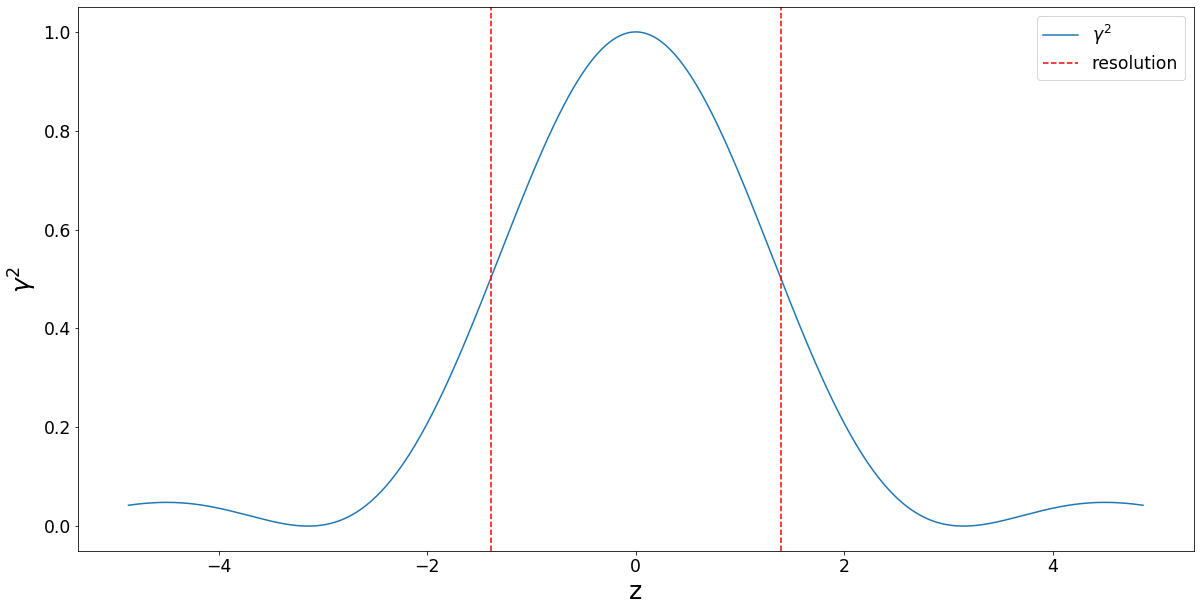

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import pylab as pylab

params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (20, 10),
          'axes.labelsize': 'xx-large',
          'axes.titlesize':'xx-large',
          'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)

L = 1
N = 20
f = 500
c0 = 340
delta_x = L / (N - 1)
n = np.linspace(1,N,N)
x = - L/2 + n * delta_x
lam = c0 / f


theta = np.linspace(-np.pi/2,np.pi/2,1000)
theta_0 = 0

z = np.pi * (L/lam) * (N / (N - 1)) * (np.sin(theta) - np.sin(theta_0))

gamma_2 = (np.sin(z) / (N * np.sin(z / N)))**2

plt.figure()
plt.plot(z,gamma_2, label = '$\gamma^2$')
plt.axvline(x = 1.39, color = 'red', linestyle='--', label = 'resolution')
plt.axvline(x = -1.39, color = 'red', linestyle='--')
plt.xlabel('z',fontsize=25)
plt.ylabel(r'$\gamma^2$',fontsize=25)
plt.legend()

### 2D array performances
#### Configuration

In [13]:
#%% Experimental set-up

# Random array description

# The array is composed of n_mic microphones randomly arranged

n_mic = 100                                                                   # number of microphones
pos_xy = np.random.uniform(low=-0.6, high=0.6, size=(n_mic,2))
array_coord = np.hstack((pos_xy,np.zeros((pos_xy.shape[0],1))))               # coordinates of the microphones

# grid
grid_len = 1                                                                  # length of grid's edge (m)
grid_step = 0.01                                                              # step between two nodes (m)
vec = np.arange(-grid_len/2, grid_len/2 + grid_step, grid_step)
Ym, Xm = np.meshgrid(vec, vec)
dz_array_grid = -0.1                                                          # distance between the array and grid planes
Zm = dz_array_grid * np.ones(Xm.shape)             

grid_coord = np.array([Xm.flatten(), Ym.flatten(), Zm.flatten()]).T.copy()    # nodes' grid coordinates
grid_shape = (len(vec), len(vec))                                             # shape of the grid
grid_N = len(vec) * len(vec)                                              # number of nodes

# Source description

source_case = 'a'  # case a : two sources, cas b : one centered source

if source_case == 'a':
    
    # Two sources

    ind_src = [4000,6000]                                                     # indexes of the sources in the grid
    source_coord = np.array(grid_coord[ind_src,])                             # coordinates of the sources
    amplitude = np.array([2e-5,2e-5])                                         # sources' amplitudes
    coherence = np.array([[1,0],[0, 1]])                                      # sources' coherence
    
elif source_case == 'b':

    # One centered source
    
    ind_center = np.argwhere(np.all(abs(grid_coord-np.array([0,0,dz_array_grid]))<0.001, axis=1))[0][0]
    source_coord = np.array(grid_coord[ind_center,np.newaxis])
    amplitude = np.array([2e-5])
    coherence = np.array([1])

Text(0.5, 0.92, 'Experimental configuration')

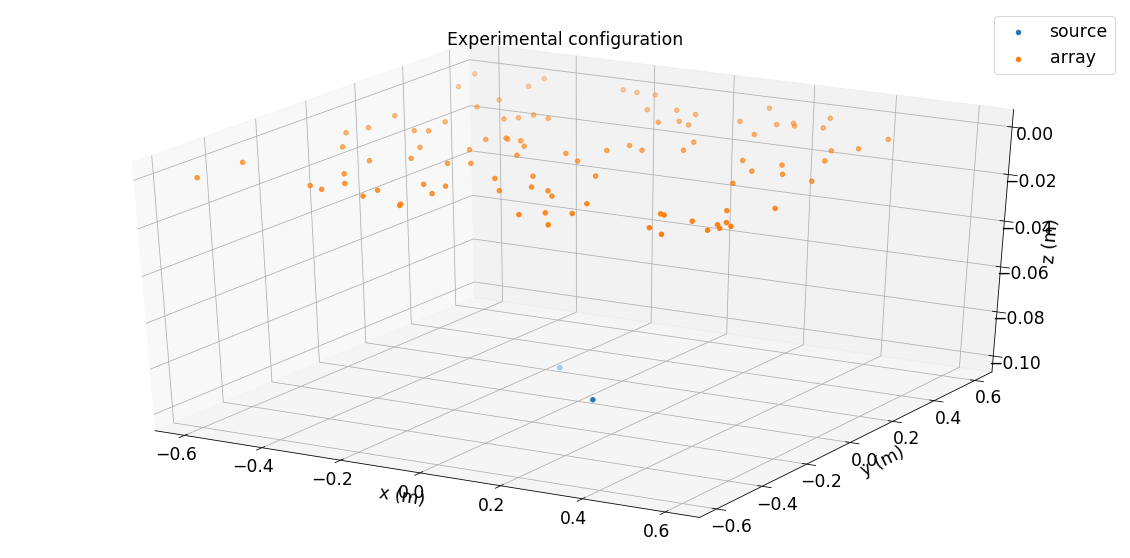

In [14]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(source_coord[:,0],source_coord[:,1],source_coord[:,2], label = 'source')
ax.scatter(array_coord[:,0],array_coord[:,1],array_coord[:,2], label = 'array')
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_zlabel('z (m)')
plt.legend()
plt.title('Experimental configuration')

#### Conventional Beamforming - Coherence Indicator

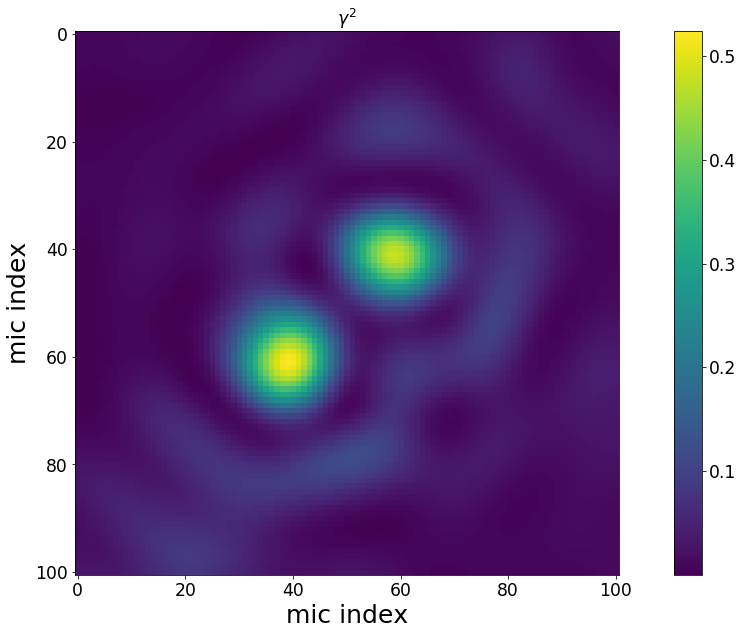

In [15]:
from scipy.spatial.distance import cdist

c0 = 343    # speed of sound (m/s)
rho = 1.2   # density of air (kg/m3)

# Source generation at f

f = 1000    # frequency (Hz)

#    1 - Transfer function calculation

def G(coord1, coord2, f):
    '''
    The G function calculates the free-field transfer function between two objects of coordinates coord1 and coord2
    
    parameters :
        coord1, coord2 : coordinates of the two objects [Nnodes x Ndim] (m)
        f : frequency (Hz)
        
    return :
        g : transfer function [Nnodes_coord1 x Nnodes_coord2]
    '''
    
    k = 2 * np.pi * f / c0
    D = cdist(coord1, coord2)
    g = 1 / D * np.exp(1j * k * D)
    g *= -1j * f * rho / 2
    return g

g_source_array = G(array_coord, source_coord, f)

#    2 - Creation of the cross spectral matrix of the sources 

Ns = amplitude.shape[0]                                              # Number of sources
Sqq = np.zeros((Ns,Ns))                                              # CSM of the sources
for i in range(0,Ns):
    for j in range(0,Ns):
            if i==j:
                Sqq[i][j] = amplitude[i]**2
            else :
                Sqq[i][j] = np.sqrt(coherence[i,j]*(amplitude[i]**2)*amplitude[j]**2)

#    3.Deduction of the propagated CSM to the array
                
Spp = g_source_array @ Sqq @ np.conj(g_source_array).T               # CSM of the microphones

# Compute Transfer Functions

g_array_grid = G(array_coord, grid_coord, f)

# Conventionnal Beamforming

nNode = g_array_grid.shape[1]                                        # Number of grid's nodes
maps = np.zeros((nNode,))                                            # Beamformer - coherence indicator

for iNode in range(0, nNode): 
    A = g_array_grid[:,iNode]
    pond = (A[:,np.newaxis].conj().T @ A[:,np.newaxis]).real
    maps[iNode]=(A[:,np.newaxis].conj().T @ Spp @ A[:,np.newaxis]).real/(pond*np.trace(Spp).real)

CBF_gamma2 = maps.reshape(grid_shape).T                              # Conventional Beamforming - \gamma^2

# Display

plt.figure()
plt.imshow(CBF_gamma2)
plt.title(r'f = %i Hz' %f, fontsize=25)
plt.xlabel(r'mic index',fontsize=25)
plt.ylabel(r'mic index',fontsize=25)
plt.title('$\gamma^2$')
plt.colorbar()
plt.show()



Text(0.5, 0.92, '$\\gamma^2$')

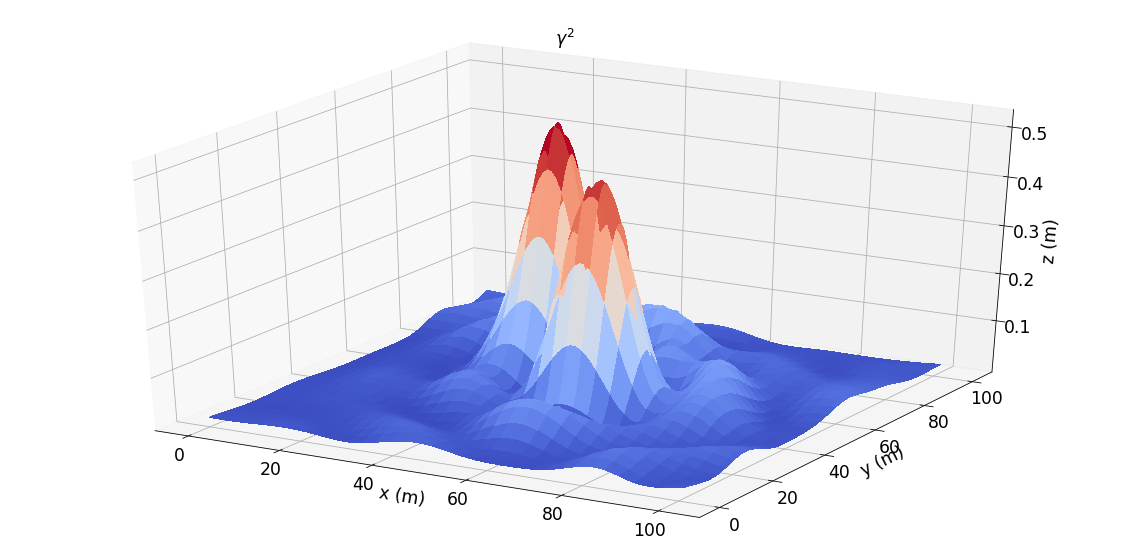

In [16]:
from matplotlib import cm

X = np.linspace(0, int(np.sqrt(grid_N)), int(np.sqrt(grid_N)))
Y = X
X, Y = np.meshgrid(X,Y)
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, CBF_gamma2, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_zlabel('z (m)')
plt.title('$\gamma^2$')